# Memento sur Matplotlib

resources : [Matplotlib Tips and Demos](https://nbviewer.org/urls/gist.githubusercontent.com/Jwink3101/e6b57eba3beca4b05ec146d9e38fc839/raw/f486ca3dcad44c33fc4e7ddedc1f83b82c02b492/Matplotlib_Cheatsheet)

In [106]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
prets = pd.read_csv('./resources/prets.csv')
prets.head()

,identifiant,ville,CP,revenu,remboursement,duree,type,taux
0,0,TOULOUSE,31100,3669.0,1130.05,240,immobilier,1.168
1,1,PARIS,75009,5310.0,240.00,64,automobile,3.701
2,1,PARIS,75009,5310.0,1247.85,300,immobilier,1.173
3,2,MARSEILLE,13010,1873.0,552.54,240,immobilier,0.972
4,3,MARSEILLE,13010,1684.0,586.03,180,immobilier,1.014


## Nuage de points - Scatter

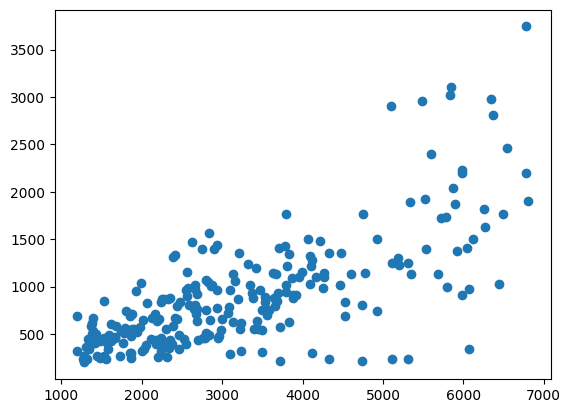

In [11]:
plt.scatter(prets['revenu'], prets['remboursement'])
plt.show()

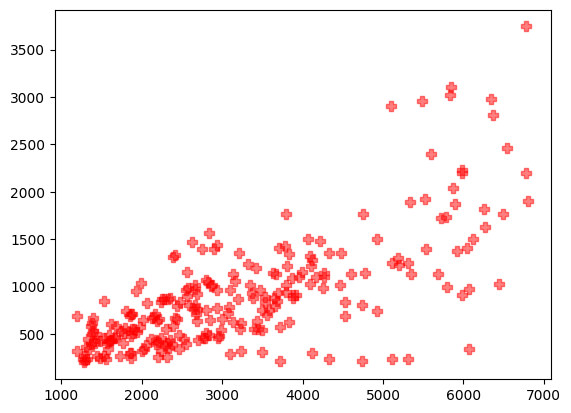

In [10]:
plt.scatter(prets['revenu'], prets['remboursement'], s=60, alpha=0.5, c="red", marker="P")
plt.show()

## Diagramme circulaire

In [7]:
# On doit avant agréger les données
data = prets.groupby('ville')['remboursement'].sum()
data = data.reset_index()
data

,ville,remboursement
0,BORDEAUX,15330.59
1,LYON,26064.67
2,MARSEILLE,40895.72
3,NICE,23544.24
4,PARIS,94052.61
5,TOULOUSE,19286.18


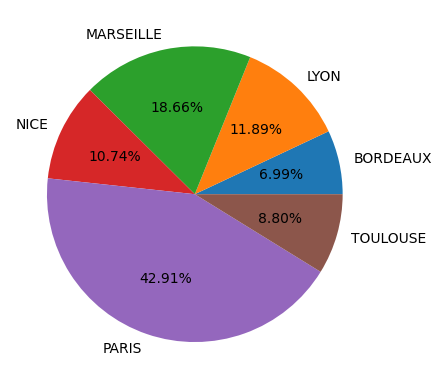

In [12]:
plt.pie(x=data['remboursement'], labels=data['ville'], autopct='%.2f%%')
plt.show()

## Diagramme à barres

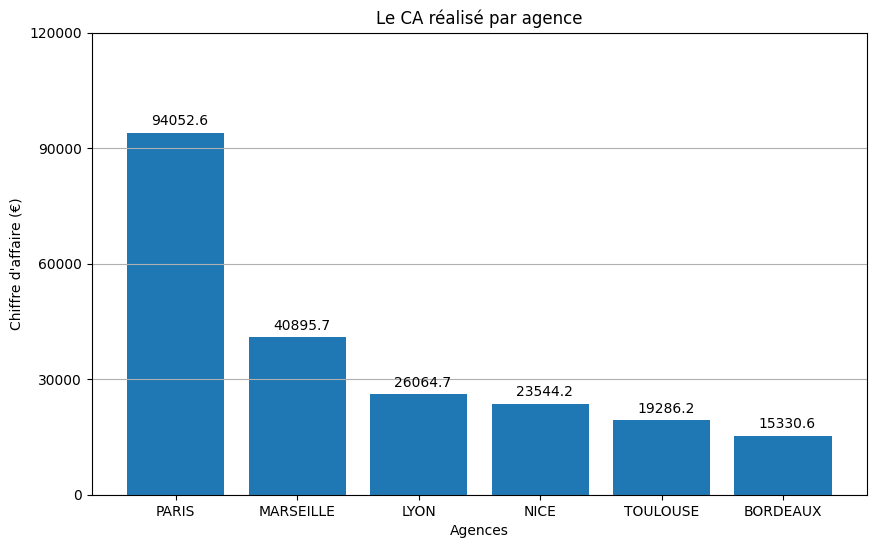

In [57]:
# On effectue un trie pour rendre le diagramme plus présentable
data_sorted = data.sort_values('remboursement', ascending=False)

# On agrandit la fenêtre
plt.figure(figsize=(10,6))

plt.bar(height=data_sorted['remboursement'], x=data_sorted['ville'])

# Titre principal du graphique
plt.title("Le CA réalisé par agence")

# Titre sur les axes
plt.xlabel('Agences')
plt.ylabel("Chiffre d'affaire (€)")

# Ajout d'un quadrillage (uniquement sur l'axe des ordonnées (y)
plt.grid(axis="y")

# Fixer la limite de graduation
plt.ylim(0,120000)
# Espacement entre les graduations (il faut mettre à la main les différents pallier)
plt.yticks([i for i in range(0, 125000, 30000)])

# Afficher la valeur en haut de chaque barre
ca = data_sorted['remboursement'].tolist()
# Le decalage doit doit correspondre à l'unité des axes, ici en abscisse il s'agit d'une unité de "un" (indice des villes) et en ordonnée
# il s'agit du ca en euro en milliers d'euros
decalage_x = 0.2
decalage_y = 2000

for i in range(len(data_sorted['ville'])):
    x = i - decalage_x
    y = ca[i] + decalage_y
    value = round(ca[i], 1)
    # On positionne le texte au coordonnées souhaités
    plt.text(x, y, value)

print()

plt.show()


## Histogramme

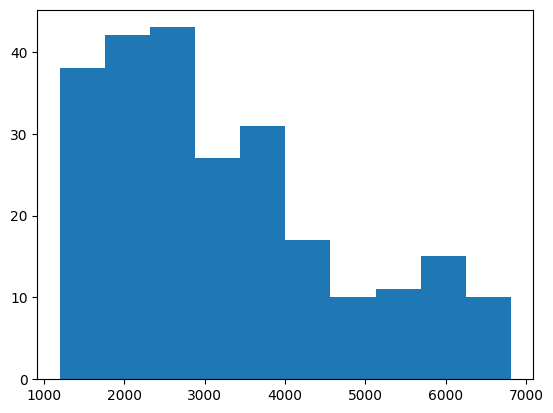

In [15]:
plt.hist(prets['revenu'])
plt.show()

## Les courbes 

In [16]:
ca = pd.DataFrame({ 'date' : ['2023-01-01', '2023-02-01', '2023-03-01', '2023-04-01'], 'ca' : [183000,193020,179032,219174] })
ca

,date,ca
0,2023-01-01,183000
1,2023-02-01,193020
2,2023-03-01,179032
3,2023-04-01,219174


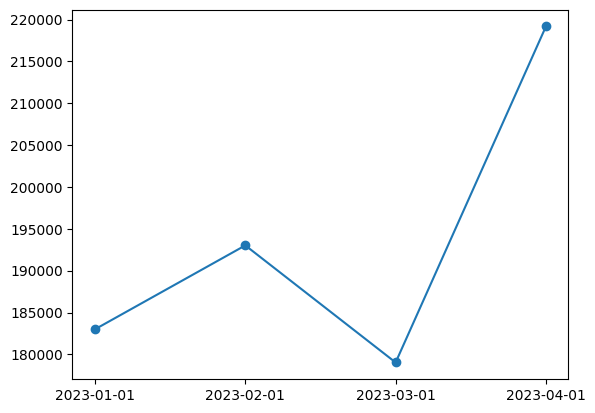

In [19]:
plt.plot(ca['date'], ca['ca'], marker='o')
plt.show()

## Superposition de d'information

In [20]:
prets.head()

,identifiant,ville,CP,revenu,remboursement,duree,type,taux
0,0,TOULOUSE,31100,3669.0,1130.05,240,immobilier,1.168
1,1,PARIS,75009,5310.0,240.00,64,automobile,3.701
2,1,PARIS,75009,5310.0,1247.85,300,immobilier,1.173
3,2,MARSEILLE,13010,1873.0,552.54,240,immobilier,0.972
4,3,MARSEILLE,13010,1684.0,586.03,180,immobilier,1.014


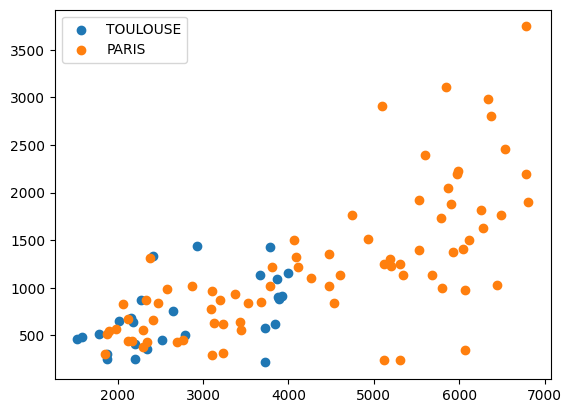

In [27]:
df1 = prets.loc[ prets['ville'] == 'TOULOUSE' ]
df2 = prets.loc[ prets['ville'] == 'PARIS' ]

plt.scatter(df1['revenu'], df1['remboursement'], label='TOULOUSE')
plt.scatter(df2['revenu'], df2['remboursement'], label='PARIS')
plt.legend()
plt.show()

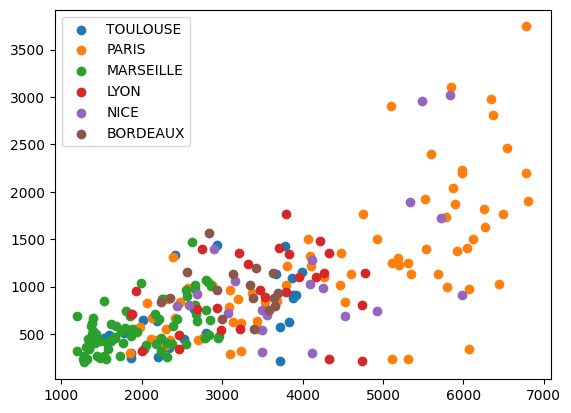

In [28]:
villes = prets['ville'].unique()

for ville in villes:
    df = prets.loc[ prets['ville'] == ville, : ]
    plt.scatter(df['revenu'], df['remboursement'], label=ville)

plt.legend()
plt.show()

## Seaborn

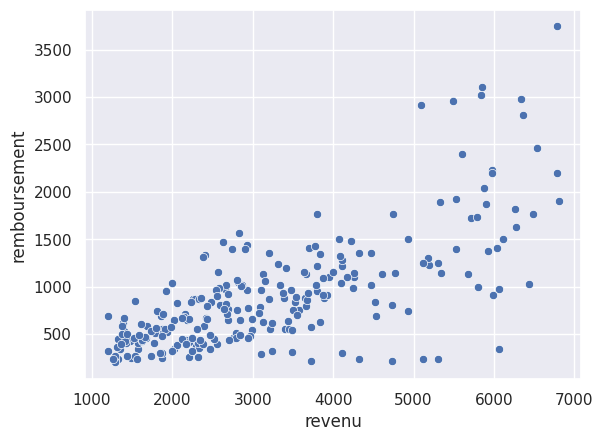

In [113]:
# Simple vizu des remboursement en fonction du revenu

# Theme par défaut de seaborn
sns.set_theme()

sns.scatterplot(data=prets, x='revenu', y='remboursement')
plt.show()

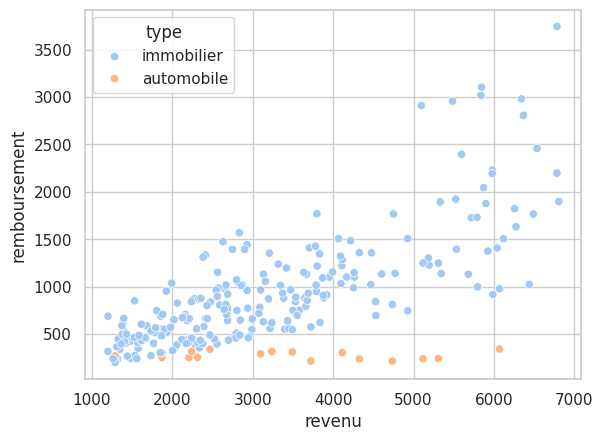

In [112]:
# # Simple vizu des remboursement en fonction du revenu mais en faisant la distinction entre les différents types
# au lieu de préparer les différents dataframe dans une boucle comme avec matplotlib en version native

# Selection d'un thème
sns.set_theme(style='whitegrid', palette='pastel')

sns.scatterplot(data=prets, x='revenu', y='remboursement', hue="type")
plt.show()

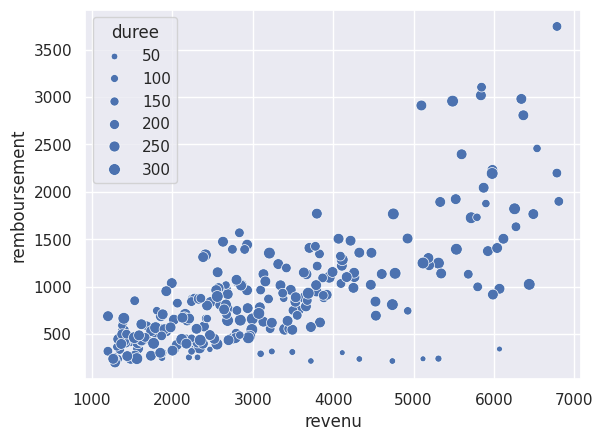

In [114]:
# Simple vizu des remboursement en fonction du revenu mais ayant comme information supplémentaire la durée
# Ici la taille du point est en fonction de la durée du pret
sns.scatterplot(data=prets, x='revenu', y='remboursement', size="duree")
plt.show()

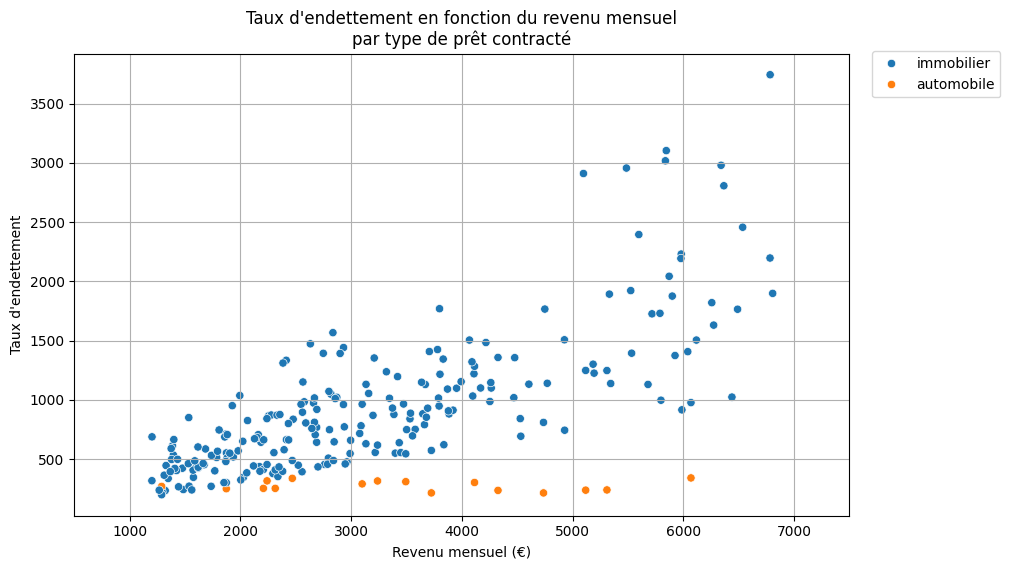

In [118]:
# On reset le thème de seaborn
sns.reset_defaults()

plt.figure(figsize=(10,6))
# plt.rcParams.update({'font.size': 14})
sns.scatterplot(data=prets, x='revenu', y='remboursement', hue="type")

plt.ylabel("Taux d'endettement")
plt.xlabel('Revenu mensuel (€)')

plt.grid()
plt.xlim(500, 7500)
# Pour fixer la légende en dehors du graphique à des coordonnées précises
plt.legend(bbox_to_anchor=(1.02, 1.02))

plt.title("Taux d'endettement en fonction du revenu mensuel\npar type de prêt contracté")

plt.show()

<Axes: xlabel='ville', ylabel='remboursement'>

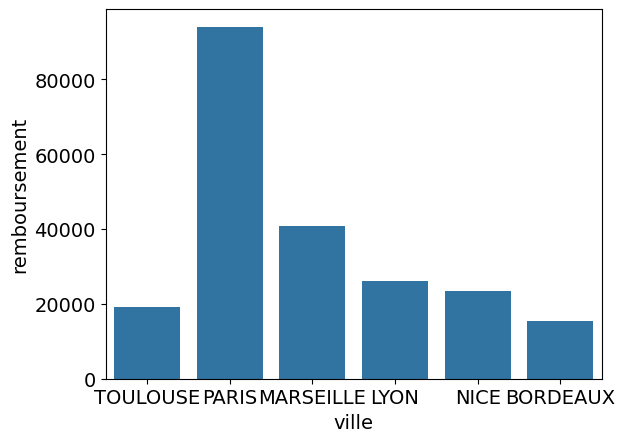

In [109]:
# Agrégation directement via seaborn
# La somme des remboursements par ville
sns.barplot(data=prets, x='ville', y='remboursement', errorbar=None, estimator=sum)

<Axes: xlabel='ville', ylabel='remboursement'>

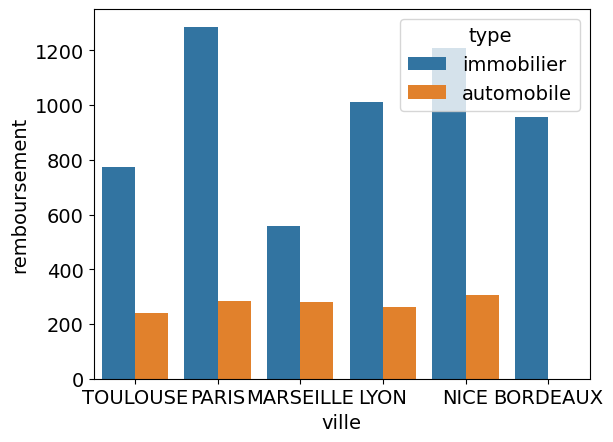

In [110]:
# La moyenne de remboursement par ville et par type de pret
sns.barplot(data=prets, x='ville', y='remboursement', errorbar=None, estimator=np.mean, hue='type')